# Impurity and information criterions
Information criteria are statistical measures used to evaluate and compare different models, including decision trees, based on their ability to fit the data while penalizing for model complexity. Information criteria are often used during the process of splitting nodes in decision trees to determine the best feature and split point. Two common information criteria used in this context are the Gini impurity and entropy.


## Impurity measure in classification trees

Let $\mathcal Y = \{1, \ldots, K\}$. Estimate probability of class $k$ at some node $V$ as

$$
p_k = \frac 1n\sum\limits_{(\boldsymbol x_i, y_i)\in V} \mathbb I[y_i = k].
$$

The main two impurity measures for classification are **entropy** and **Gini**.
### Entropy
>___Entropy___ _is a scientific concept as well as a measurable physical property that is most commonly associated with a state of disorder, randomness, or uncertainty._


In Decision Trees, entropy measures how mixed or impure a group of data is at a certain point. So, a node with a mix of outcomes, like 2 Pass and 2 Fail, has higher entropy compared to a node with only Pass or only Fail. Entropy ranges from 0 (indicating minimum disorder) to 1 (indicating maximum disorder).


Given a set of six examples like this, we have three cats and three dogs, $P_1$ = fraction of examples that are cats.We're going to measure the impurity of a set of examples using a function called the entropy which looks like this. The entropy function is conventionally denoted as capital H of this number $p_1$ and the function looks like this curve over here where the horizontal axis is $p_1$, the fraction of cats in the sample, and the vertical axis is the value of the entropy.


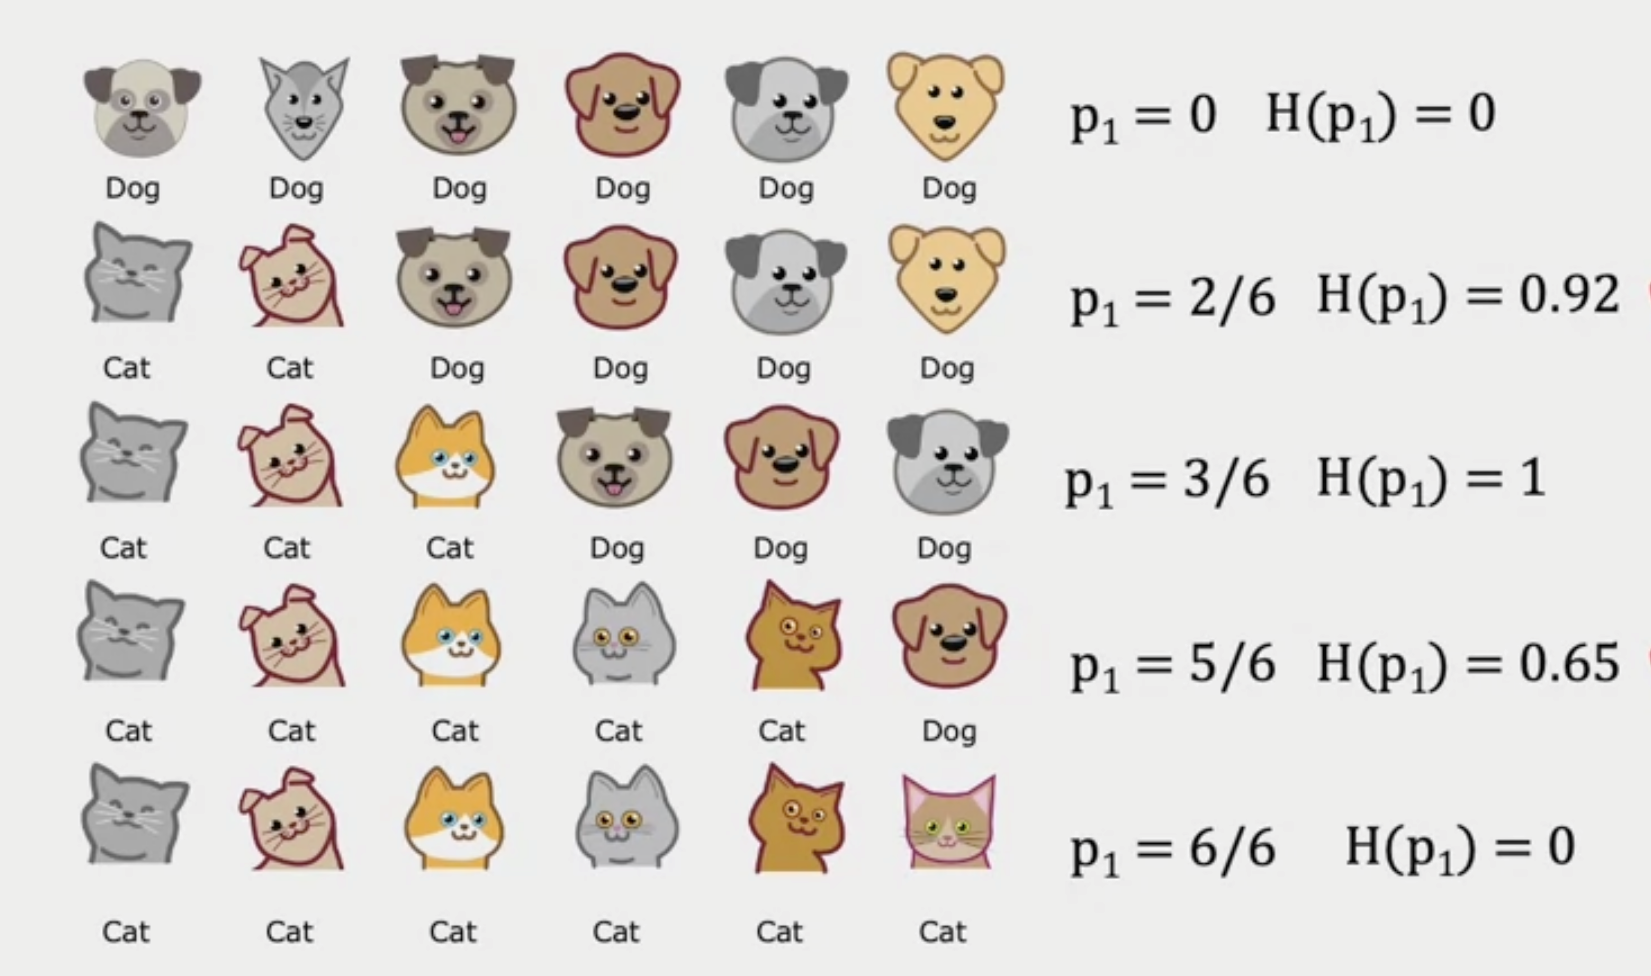

In [5]:
import numpy as np
import plotly.graph_objs as go

def calculate_entropy(p):
    if p == 0 or p == 1:  # To handle the log(0) case
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Creating the Entropy Plot
def plot_entropy():
    p_values = np.linspace(0, 1, 100)
    entropy_values = [calculate_entropy(p) for p in p_values]

    fig = go.Figure(data=go.Scatter(x=p_values, y=entropy_values, mode='lines', name='Entropy'))
    fig.update_layout(title='Entropy of a Binary Classification System',
                      xaxis_title='Probability of Class 1 (p)',
                      yaxis_title='Entropy',
                      height=400, width=700)
    fig.show()

plot_entropy()


__Formula of Entropy__<br>
Consider $p_1$ as the fraction of examples representing cats. For instance, if $2/3$ of a sample consists of cats, then the remaining $1/3$ must represent non-cats. Let's denote $p_0$ as the fraction of examples that are not cats: <br>


$$p_0=1−p_1$$

The entropy function then defined as: <br>







$$H(p_1) = -p_1log_2(p_1) - p_0log_2(p_0) = -p_1log_2(p_1) -(1-p_1)log_2(1-p_1)$$

>Note: $0log(0)=0$

In [1]:
!pip install jupyterquiz
from jupyterquiz import display_quiz
import json
from base64 import b64encode

def get_spanned_encoded_q(q, q_name):
    byte_code = b64encode(bytes(json.dumps(q), 'utf8'))
    return f'<span style="display:none" id="{q_name}">{byte_code.decode()}</span>'

ModuleNotFoundError: No module named 'jupyterquiz'

In [ ]:
question_1 = [{
    "question": "At a given node of a decision tree, 6 of 10 examples are cats and 4 of 10 are not cats. Which expression calculates the entropy $H_{p1}$ of this group of 10 animals?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "$0.6log_2(0.6)+(1-0.4)log_2(1-0.6)$",
            "correct": False,
            "feedback": "Try again!"
        },
        {
            "answer": "$-0.6log_2(0.6)-(0.4)log_2(0.4)$",
            "correct": False,
            "feedback": "Try again!"
        },
        {
            "answer": "$0.6log_2(0.6)+(0.4)log_2(0.4)$",
            "correct": False,
            "feedback": "Try again!"
        },
        {
            "answer": "$-0.6log_2(0.6)-(1-0.4)log_2(1-0.4)$",
            "correct": True,
            "feedback": "Correct answer!"
        },
    ]
}]

In [ ]:
display_quiz(question_1)

### Gini
Gini Impurity is a measurement used to build Decision Trees to determine how the features of a dataset should split nodes to form the tree. <br>
More precisely, the Gini Impurity of a dataset is a number between 0-0.5, which indicates the likelihood of new, random data being misclassified if it were given a random class label according to the class distribution in the dataset.

For a credit card default prediction, imagine sorting people based on age, income, credit rating, and student status. To find the best feature for the first split of the tree – the root node, evaluate how well each feature separates those who default ("yes") from those who don't ("no"). This calculation would measure the **impurity** of the split, and the feature with the lowest impurity would determine the best feature for splitting the current node. This process would continue for each subsequent node using the remaining features.

In the image above, shows the minimum Gini Impurity, leading to its selection as the root in the decision tree.

#### Mathematical definition
Consider a dataset D that contains samples from k classes. The probability of samples belonging to class i at a given node can be denoted as $p_i$. Then the Gini Impurity of  is defined as:<br>

$$Gini(D) = 1-Σp^2_i$$

In [ ]:
import numpy as np
import plotly.graph_objs as go
def calculate_gini(p):
    return 1 - (p ** 2 + (1 - p) ** 2)

# Creating the Gini Impurity Plot
def plot_gini():
    p_values = np.linspace(0, 1, 100)
    gini_values = [calculate_gini(p) for p in p_values]

    fig = go.Figure(data=go.Scatter(x=p_values, y=gini_values, mode='lines', name='Gini Impurity', line=dict(color='red')))
    fig.update_layout(title='Gini Impurity of a Binary Classification System',
                      xaxis_title='Probability of Class 1 (p)',
                      yaxis_title='Gini Impurity',
                      height=400, width=700)
    fig.show()

plot_gini()


### Information Gain <br>
It’s finally time to answer the question we posed earlier: **how can we quantify the quality of a split?**<br>
Information gain or **IG** is a statistical property that measures how well a given attribute separates the training examples according to their target classification. Constructing a decision tree is all about finding an attribute that returns the highest information gain and the smallest entropy.<br>


$$H(p^{\text{root_1}}) - (w^{\text{left}} *H(p^{\text{left_1}})  + w^{\text{right}} * H(p^{\text{right_1}}))$$


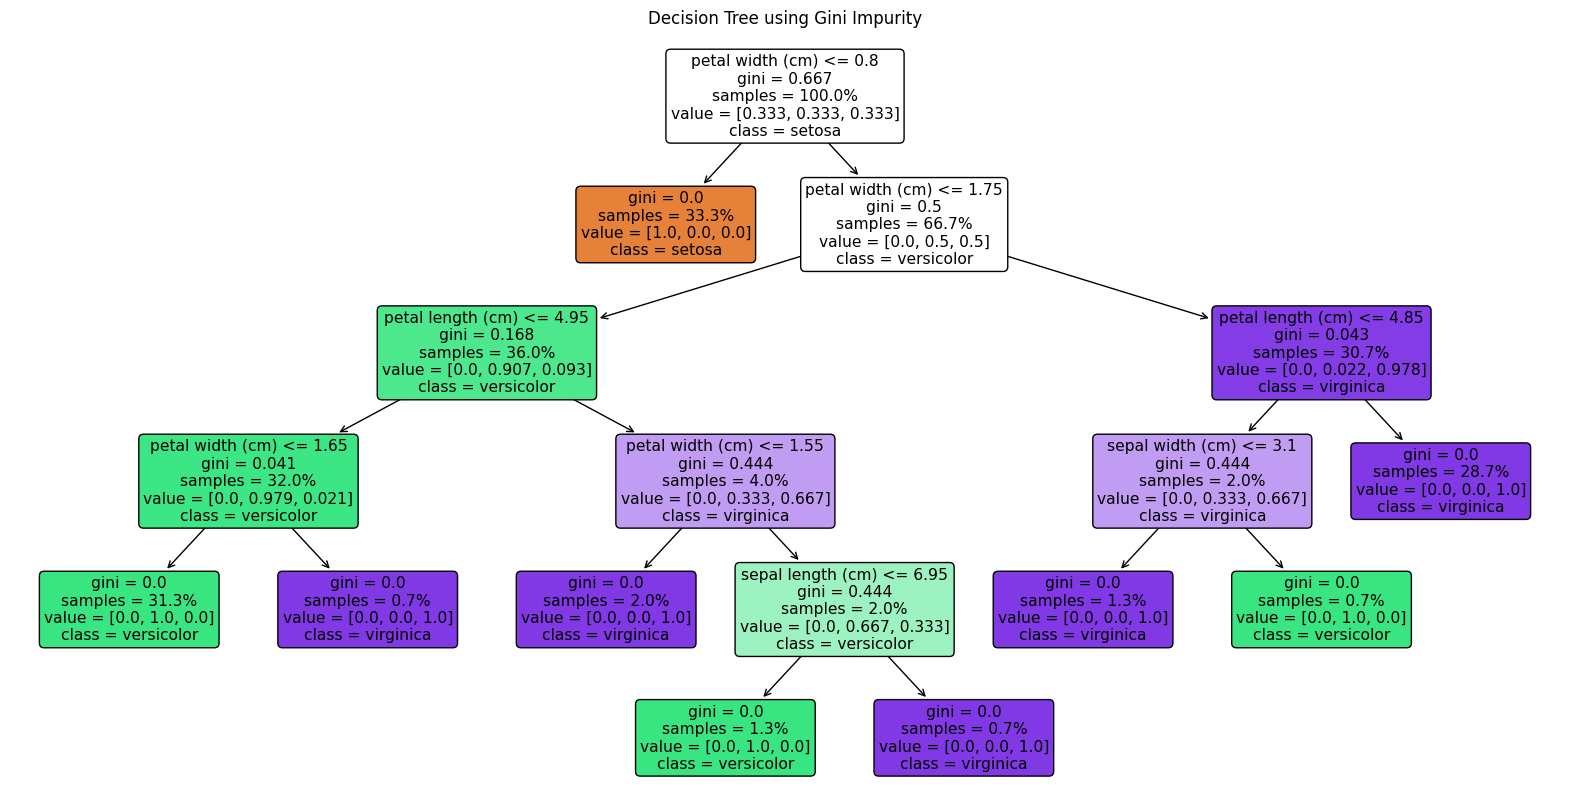

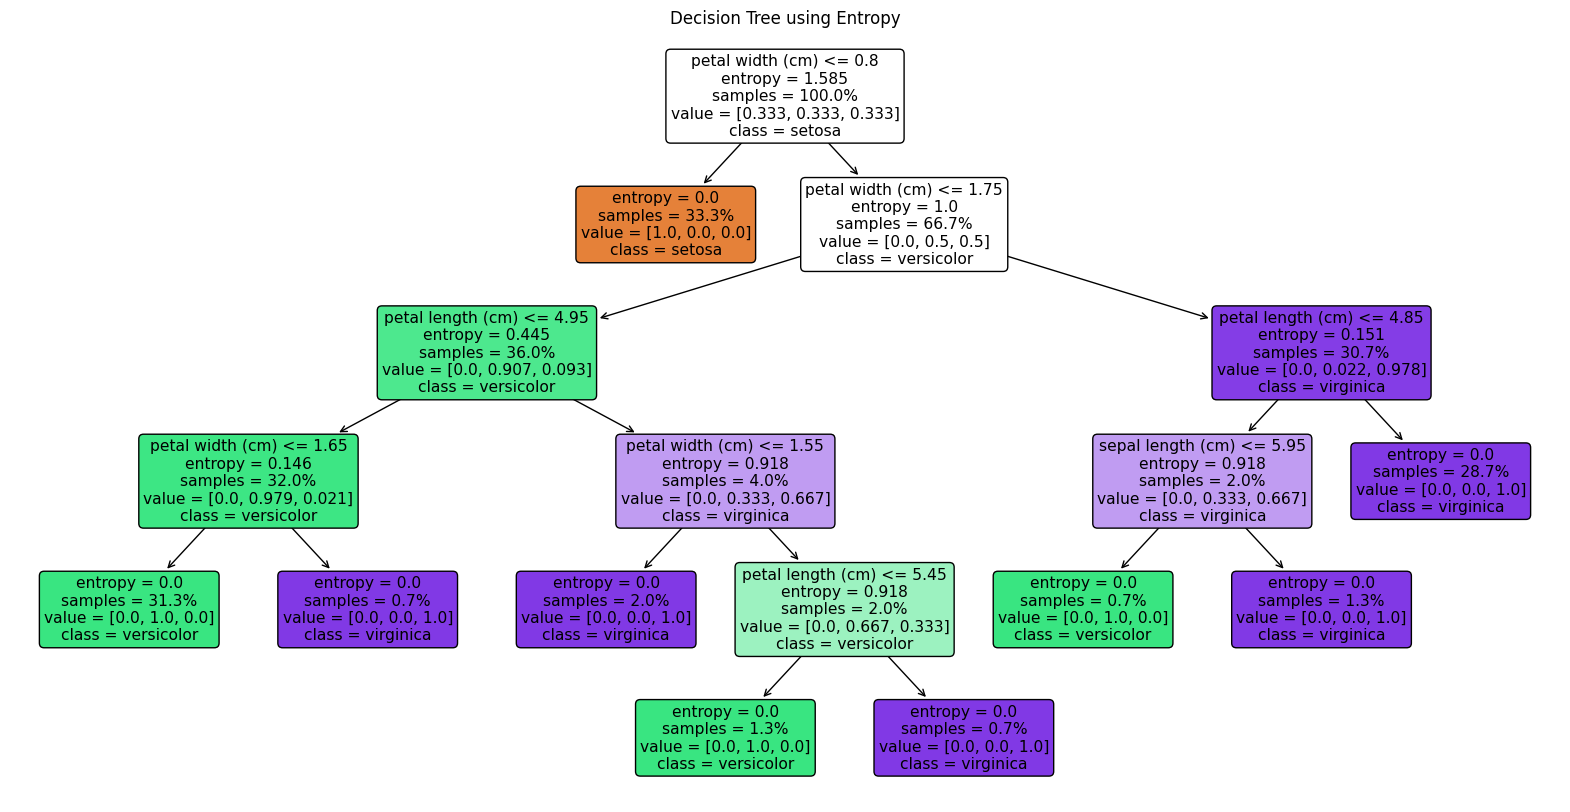

In [ ]:
#information gain code
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Function to build and plot a decision tree
def build_and_plot_tree(criterion, title):
    clf = DecisionTreeClassifier(criterion=criterion)
    clf.fit(X, y)

    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=iris.feature_names,
              class_names=iris.target_names, rounded=True, proportion=True)
    plt.title(f"Decision Tree using {title}")
    plt.show()

# Building and plotting trees using Gini and Entropy
build_and_plot_tree('gini', 'Gini Impurity')
build_and_plot_tree('entropy', 'Entropy')


In [ ]:
question_2 = [{
    "question": "Before a split, the entropy of a group of 5 cats and 5 non-cats is $H(5/10)$. After splitting on a particular feature, a group of 7 animals (4 of which are cats) has an entropy of $H(4/7)$. The other group of 3 animals (1 is a cat) and has an entropy of $H(1/3)$. What is the expression for information gain?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "$H(0.5)-(\\frac7{10}H(\\frac4{7})+\\frac3{10}H(\\frac1{3}))$",
            "correct": False,
            "feedback": "Try again!"
        },
        {
            "answer": "$H(0.5)-(7*H(\\frac4{7})+3*H(\\frac1{3}))$",
            "correct": False,
            "feedback": "Try again!"
        },
        {
            "answer": "$H(0.5)-(H(\\frac4{7})+H(\\frac1{3}))$",
            "correct": False,
            "feedback": "Try again!"
        },
        {
            "answer": "$$H(0.5)-(\\frac4{7}*H(\\frac4{7})+\\frac4{7}*H(\\frac1{3}))$$",
            "correct": True,
            "feedback": "Correct answer!"
        },
    ]
}]

In [ ]:
display_quiz(question_2)